In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 


white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=';')
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=";")


In [3]:
white.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
red.sample(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1521,6.9,0.480,0.20,1.9,0.082,9.0,23.0,0.99585,3.39,0.43,9.05,4
913,9.4,0.395,0.46,4.6,0.094,3.0,10.0,0.99639,3.27,0.64,12.20,7
112,8.4,0.600,0.10,2.2,0.085,14.0,111.0,0.99640,3.15,0.66,9.80,5
769,7.9,0.720,0.01,1.9,0.076,7.0,32.0,0.99668,3.39,0.54,9.60,5
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.20,6
862,7.5,0.420,0.32,2.7,0.067,7.0,25.0,0.99628,3.24,0.44,10.40,5


In [6]:
print(f"sizse of white is : {white.shape} \n size of red is {red.shape}")

sizse of white is : (4898, 12) 
 size of red is (1599, 12)


In [7]:
print(f"Null value in red {pd.isnull(red).count()}")

Null value in red fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64


In [8]:
print(f"Null value in white {pd.isnull(white).count()}")

Null value in white fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64


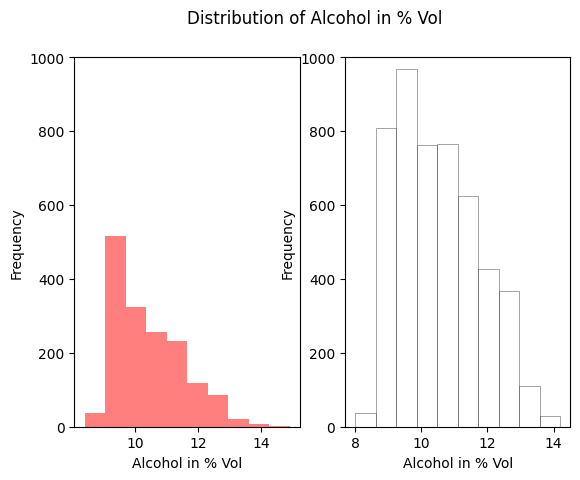

In [9]:
fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor ='red',
            alpha = 0.5, label ="Red wine")

ax[1].hist(white.alcohol, 10, facecolor ='white',
        ec ="black", lw = 0.5, alpha = 0.5,
        label ="White wine")


ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_ylim([0, 1000])
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")

fig.suptitle("Distribution of Alcohol in % Vol")
plt.show()

In [24]:
red['type'] = 1 
white['type'] = 0



wines = pd.concat([red,white],ignore_index=True)

from sklearn.model_selection import train_test_split

x = wines.iloc[:,0:11]
y = np.ravel(wines.type)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)


In [29]:
from keras.models import Sequential

from keras.layers import Dense

model = Sequential()

model.add(Dense(12,activation='relu',input_shape=(11,)))

model.add(Dense(9,activation='relu'))

model.add(Dense(1,activation='sigmoid'))
model.output_shape

model.summary()

model.get_config()

model.get_weights()
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])


c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 12)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 9)              │           117 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271 (1.06 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 0 (0.00 B)